In [1]:
import sqlite3
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
plt.style.use('seaborn-colorblind')

In [3]:
cnx = sqlite3.connect('covid_data.db')

df_rdc = pd.read_sql_query("SELECT * FROM rdc ORDER BY cc ASC", cnx)
df_usa = pd.read_sql_query("SELECT * FROM italie ORDER BY cc ASC", cnx)
df_ita = pd.read_sql_query("SELECT * FROM usa ORDER BY cc ASC", cnx)

df_rdc = df_rdc.set_index(['lesdates'])
df_usa = df_usa.set_index(['lesdates'])
df_ita = df_ita.set_index(['lesdates'])


In [4]:
df_rdc

# cc = cas confirmés

,cc,deces,guerisons
lesdates,,,
10/03,1,0,0
21/03,23,1,0
24/03,45,2,1
27/03,46,2,1
29/03,48,16,18
03/04,50,20,18
15/04,287,23,25
21/04,359,25,45
30/04,572,31,73


In [5]:
df_usa

,cc,deces,guerisons
lesdates,,,
01/03,1694,29,0
07/03,5883,233,589
14/03,21157,1441,1966
21/03,53578,4825,6072
28/03,92472,10023,12384
04/04,124632,15362,20996
11/04,152271,19468,32534
18/04,175925,23227,44927
25/04,195351,26384,63120


In [6]:
df_ita

,cc,deces,guerisons
lesdates,,,
06/03,148,10,8
11/03,1010,36,8
19/03,13816,207,18
26/03,85996,1300,348
02/04,242942,5888,9001
09/04,466033,16690,25410
16/04,671425,33286,54703
23/04,869172,49963,80203
30/04,1070032,63019,153947


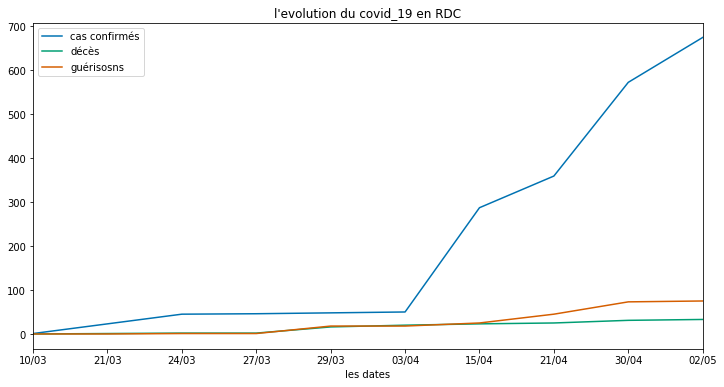

In [19]:
fig_rdc = df_rdc.plot.line(figsize=(12, 6))
#title
plt.title('l\'evolution du covid_19 en RDC')
plt.xlabel('les dates')
plt.legend(['cas confirmés', 'décès', 'guérisosns'])

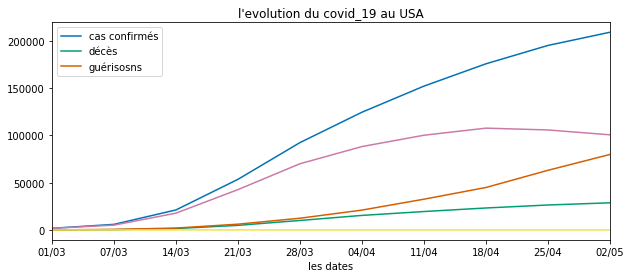

In [17]:
fig_usa = df_usa.plot.line(figsize=(12, 6))
#title
plt.title('l\'evolution du covid_19 au USA')
plt.xlabel('les dates')
plt.legend(['cas confirmés', 'décès', 'guérisosns'])

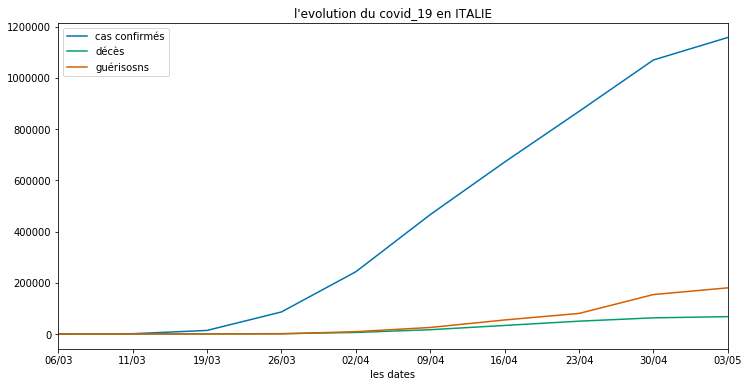

In [20]:
fig_ita = df_ita.plot.line(figsize=(12, 6))
#title
plt.title('l\'evolution du covid_19 en ITALIE')
plt.xlabel('les dates')
plt.legend(['cas confirmés', 'décès', 'guérisosns'])

In [16]:
#adding 'people still infected' and '% of death' in the usa dataframe

tm_usa = []
ptm_usa = []

for x in df_usa.index:
    v = df_usa['deces'][x] + df_usa['guerisons'][x]
    v = df_usa['cc'][x] - v
    tm_usa.append(v)
    v2 = df_usa['deces'][x] / df_usa['cc'][x]
    v2 = v2 * 100
    v2 = round(v2,1)
    ptm_usa.append(v2)

print(tm_usa)
print(ptm_usa)

#df_usa = df_usa.assign(tjrs_infecté = tm_usa, pourcentage_tm = ptm_usa)
#df_ = df_ .drop(['pourcentage_tm', 'toujours_infecté'], axis=1)
#df_usa.rename(columns={'pourcentage_tm':'deces_en_%'}, inplace=True)
df_usa

[1665, 5061, 17750, 42681, 70065, 88274, 100269, 107771, 105847, 100704]
[1.7, 4.0, 6.8, 9.0, 10.8, 12.3, 12.8, 13.2, 13.5, 13.7]


,cc,deces,guerisons,tjrs_infecté,deces_en_%
lesdates,,,,,
01/03,1694,29,0,1665,1.7
07/03,5883,233,589,5061,4.0
14/03,21157,1441,1966,17750,6.8
21/03,53578,4825,6072,42681,9.0
28/03,92472,10023,12384,70065,10.8
04/04,124632,15362,20996,88274,12.3
11/04,152271,19468,32534,100269,12.8
18/04,175925,23227,44927,107771,13.2
25/04,195351,26384,63120,105847,13.5
